In [5]:
!pip install opencv-python

  Using cached opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl (37.3 MB)


In [7]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 23.3 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 24.0 MB/s eta 0:00:00
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)


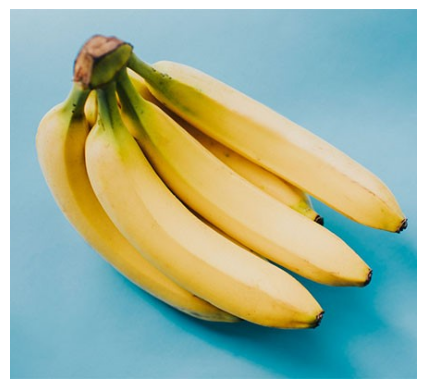

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('bananas.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

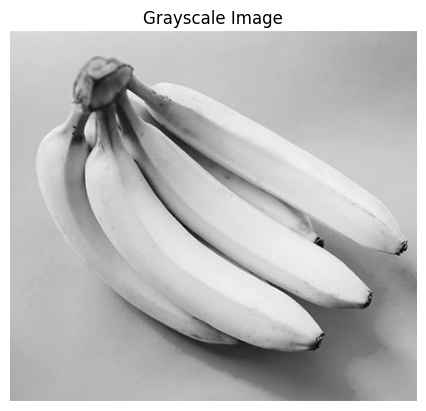

In [2]:
# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')
plt.show()

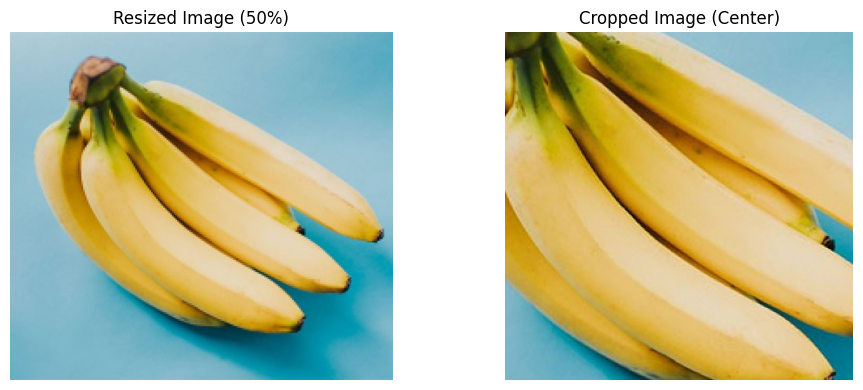

In [3]:
# Resize the image
# Resize to 50% of original dimensions
width = int(img.shape[1] * 0.5)
height = int(img.shape[0] * 0.5)
resized_img = cv2.resize(img, (width, height), interpolation=cv2.INTER_AREA)

# Display the resized image
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.title('Resized Image (50%)')
plt.axis('off')

# Crop the image (select center region)
h, w = img.shape[:2]
center_x, center_y = w // 2, h // 2
crop_size = min(w, h) // 3  # Size of the crop (1/3 of the smallest dimension)

# Calculate crop coordinates
start_x = center_x - crop_size
start_y = center_y - crop_size
end_x = center_x + crop_size
end_y = center_y + crop_size

# Perform the crop
cropped_img = img[start_y:end_y, start_x:end_x]

# Display the cropped image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image (Center)')
plt.axis('off')

plt.tight_layout()
plt.show()

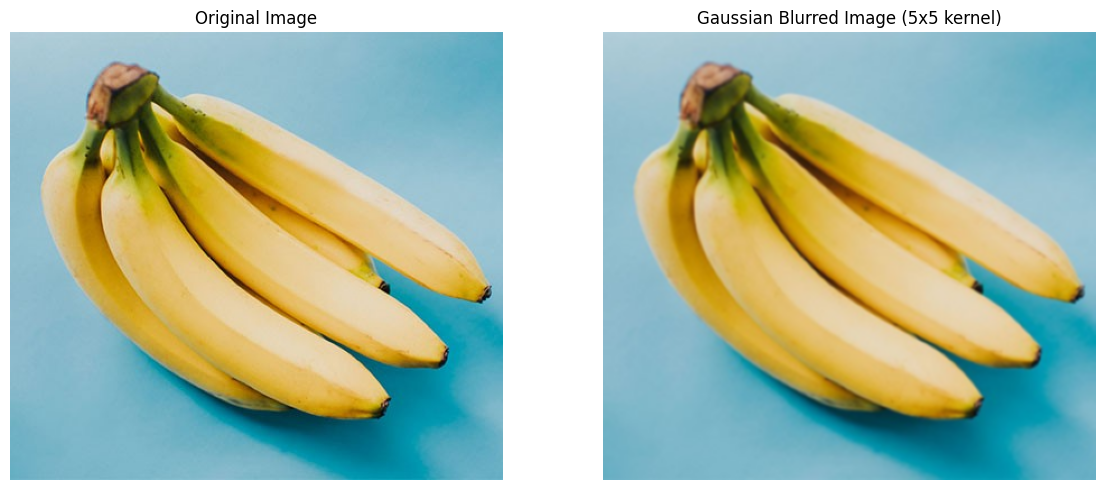

In [4]:
# Apply Gaussian blur to the image
# The (5,5) is the kernel size - higher values create more blur
# Sigma X (and optionally Sigma Y) control the standard deviation of the Gaussian kernel
blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

# Display original and blurred images side by side
plt.figure(figsize=(12, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Blurred image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Blurred Image (5x5 kernel)')
plt.axis('off')

plt.tight_layout()
plt.show()

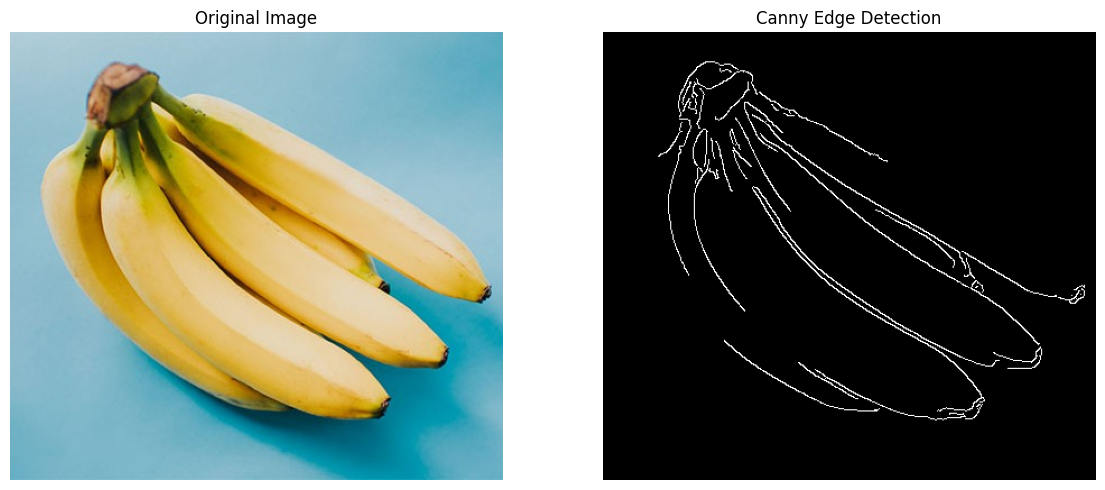

In [5]:
# Apply Canny Edge Detection
# First convert to grayscale if not already done
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise before edge detection
blurred = cv2.GaussianBlur(gray_img, (5, 5), 0)

# Apply Canny edge detection
# Parameters: image, low threshold, high threshold
# Lower threshold for weak edges, higher threshold for strong edges
edges = cv2.Canny(blurred, 50, 150)

# Display the original image and edge detection result
plt.figure(figsize=(12, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Edge detection result
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

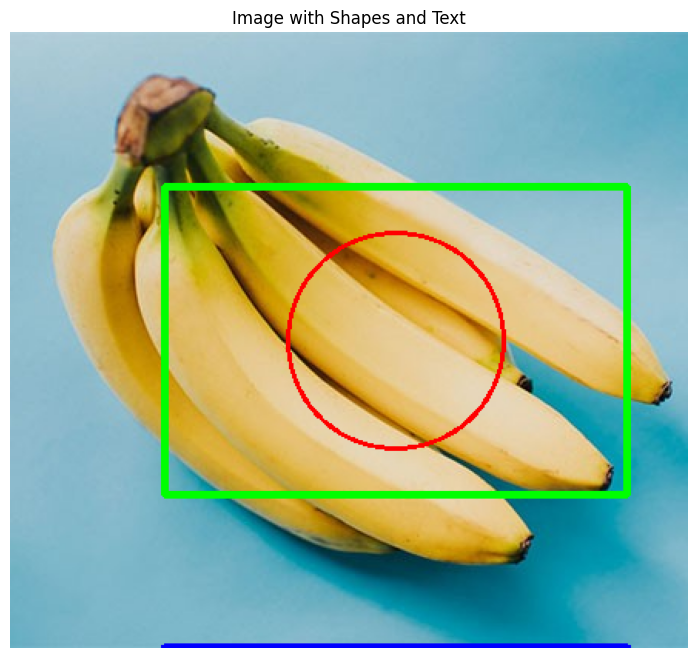

In [6]:
# Create a copy of the original image to draw on
# This avoids modifying the original image
draw_img = img.copy()

# Draw a rectangle - params: image, top-left corner, bottom-right corner, color, thickness
# BGR color format: (Blue, Green, Red)
cv2.rectangle(draw_img, (100, 100), (400, 300), (0, 255, 0), 3)  # Green rectangle

# Draw a circle - params: image, center, radius, color, thickness (-1 fills the circle)
cv2.circle(draw_img, (250, 200), 70, (0, 0, 255), 2)  # Red circle with thickness 2

# Draw a line - params: image, start point, end point, color, thickness
cv2.line(draw_img, (100, 400), (400, 400), (255, 0, 0), 5)  # Blue line with thickness 5

# Add text - params: image, text, position, font, font scale, color, thickness
cv2.putText(draw_img, "Bananas!", (150, 450), cv2.FONT_HERSHEY_SIMPLEX, 
            1.5, (255, 255, 255), 2)  # White text

# Display the result (convert to RGB for proper display with matplotlib)
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB))
plt.title('Image with Shapes and Text')
plt.axis('off')
plt.show()

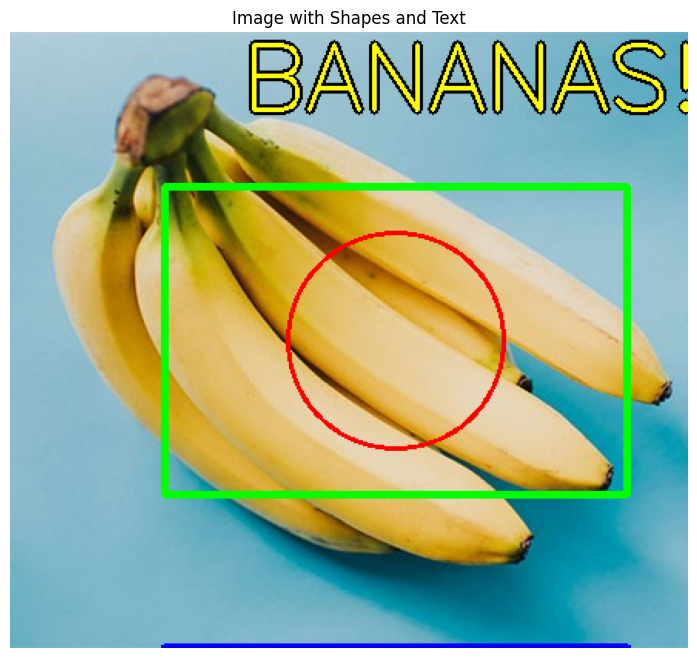

In [7]:
# Create a copy of the original image to draw on
# This avoids modifying the original image
draw_img = img.copy()

# Draw a rectangle - params: image, top-left corner, bottom-right corner, color, thickness
# BGR color format: (Blue, Green, Red)
cv2.rectangle(draw_img, (100, 100), (400, 300), (0, 255, 0), 3)  # Green rectangle

# Draw a circle - params: image, center, radius, color, thickness (-1 fills the circle)
cv2.circle(draw_img, (250, 200), 70, (0, 0, 255), 2)  # Red circle with thickness 2

# Draw a line - params: image, start point, end point, color, thickness
cv2.line(draw_img, (100, 400), (400, 400), (255, 0, 0), 5)  # Blue line with thickness 5

# Add text with a more prominent style and better positioning
# Improved text - larger font scale, thicker outline, and better position
cv2.putText(draw_img, "BANANAS!", (150, 50), cv2.FONT_HERSHEY_SIMPLEX, 
            2.0, (0, 0, 0), 6)  # Black thick outline
cv2.putText(draw_img, "BANANAS!", (150, 50), cv2.FONT_HERSHEY_SIMPLEX, 
            2.0, (0, 255, 255), 2)  # Yellow text

# Display the result (convert to RGB for proper display with matplotlib)
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB))
plt.title('Image with Shapes and Text')
plt.axis('off')
plt.show()

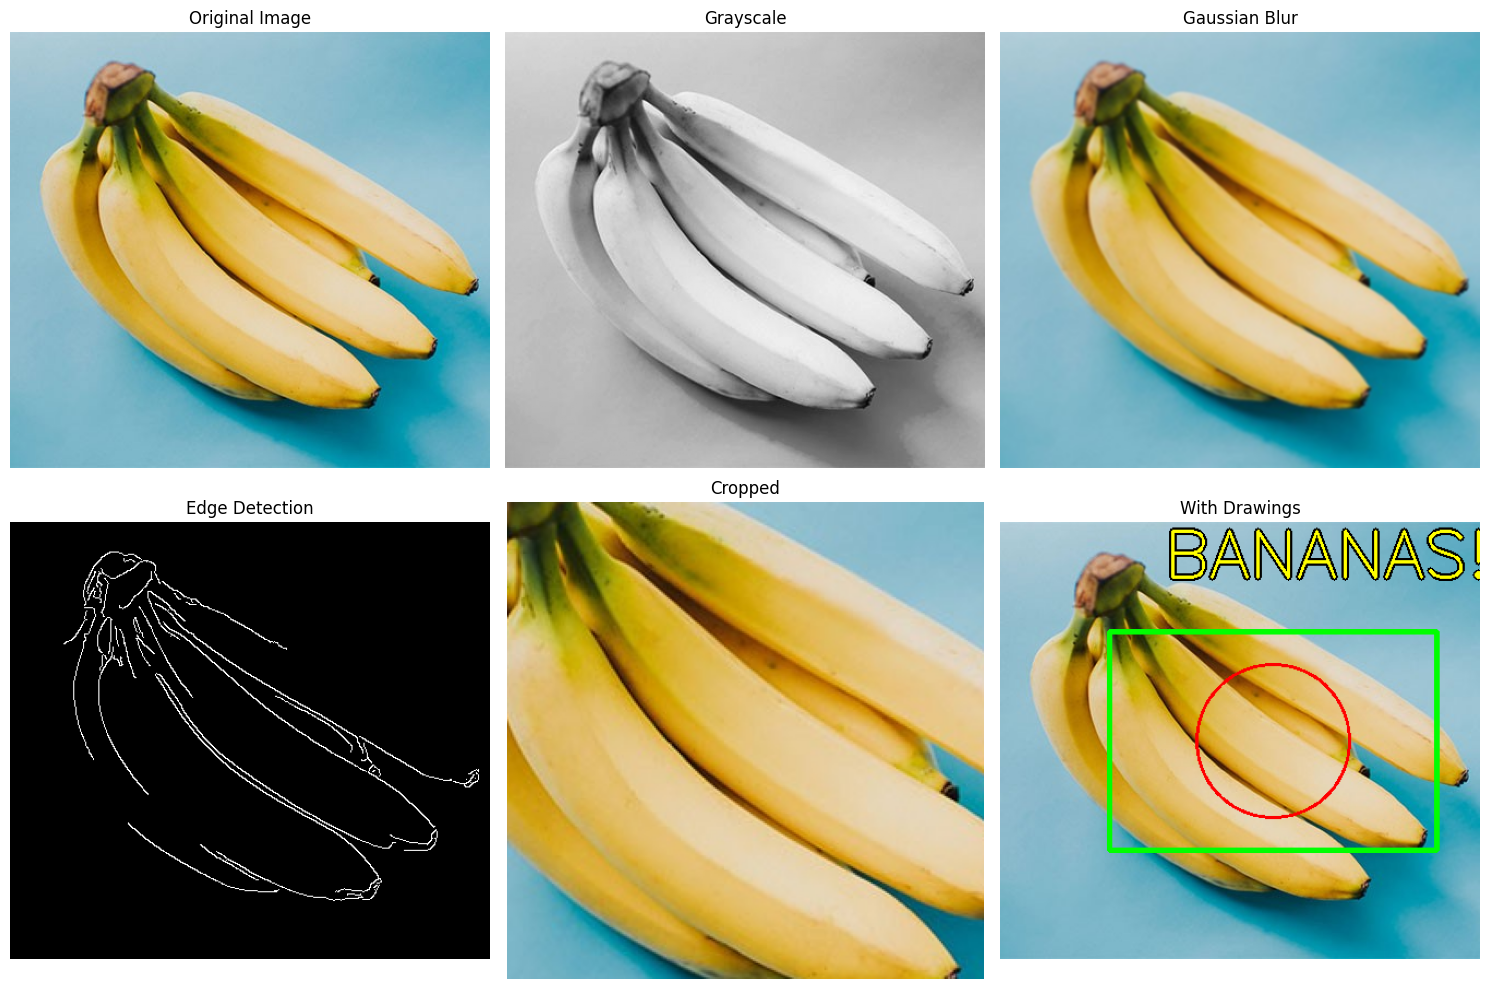

In [8]:
# Create a figure with multiple subplots in a grid
plt.figure(figsize=(15, 10))

# 1. Original image
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# 2. Grayscale
plt.subplot(2, 3, 2)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

# 3. Blurred image
plt.subplot(2, 3, 3)
blurred_img = cv2.GaussianBlur(img, (5, 5), 0)
plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Blur')
plt.axis('off')

# 4. Edge detection
plt.subplot(2, 3, 4)
edges = cv2.Canny(cv2.GaussianBlur(gray_img, (5, 5), 0), 50, 150)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')

# 5. Cropped image
plt.subplot(2, 3, 5)
h, w = img.shape[:2]
center_x, center_y = w // 2, h // 2
crop_size = min(w, h) // 3
cropped_img = img[center_y-crop_size:center_y+crop_size, center_x-crop_size:center_x+crop_size]
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.title('Cropped')
plt.axis('off')

# 6. Image with drawings
plt.subplot(2, 3, 6)
draw_img = img.copy()
cv2.rectangle(draw_img, (100, 100), (400, 300), (0, 255, 0), 3)
cv2.circle(draw_img, (250, 200), 70, (0, 0, 255), 2)
cv2.putText(draw_img, "BANANAS!", (150, 50), cv2.FONT_HERSHEY_SIMPLEX, 
            2.0, (0, 0, 0), 6)
cv2.putText(draw_img, "BANANAS!", (150, 50), cv2.FONT_HERSHEY_SIMPLEX, 
            2.0, (0, 255, 255), 2)
plt.imshow(cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB))
plt.title('With Drawings')
plt.axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()